In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('PakEnvP.xlsx','Panjab')

In [3]:
df.head(10)

,Date Recorded,Month,Location,Temp,Wind Speed,PP,Humidity,Barometer,Visibility,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),Ozone (O3),Hazard Level,AQI
0,2017-11-14 00:00:00,11,0,17.0,11.0,0.0,0.722979,1014.0,4.0,42,41.0,18.0,65.0,15.0,13,2,115.0
1,2017-11-15 00:00:00,11,0,18.0,10.0,0.0,0.722979,1015.0,5.0,64,63.0,113.0,98.0,25.0,17,3,155.0
2,2017-11-16 00:00:00,11,0,15.0,11.0,0.0,0.746471,1016.0,4.0,42,41.0,18.0,65.0,15.0,20,2,115.0
3,2017-11-17 00:00:00,11,0,17.0,0.0,0.0,0.483750,1018.0,4.0,70,69.0,193.0,100.0,19.0,9,3,158.0
4,2017-11-18 00:00:00,11,0,17.0,6.0,0.0,0.625641,1017.0,4.0,64,63.0,113.0,98.0,25.0,13,3,155.0
5,2017-11-19 00:00:00,11,0,17.0,3.0,0.0,0.466800,1017.0,5.0,70,68.0,150.0,97.0,34.0,17,3,157.0
6,2017-11-20 00:00:00,11,0,17.0,5.0,0.0,0.466800,1017.0,5.0,75,74.0,299.0,101.0,23.0,19,3,161.0
7,2017-11-21 00:00:00,11,0,17.0,6.0,0.0,0.569474,1015.0,5.0,76,74.0,202.0,111.0,36.0,14,3,161.0
8,2017-11-22 00:00:00,11,0,16.0,7.0,0.0,0.549459,1014.0,4.0,79,77.0,247.0,124.0,36.0,13,3,162.0
9,2017-11-23 00:00:00,11,0,17.0,6.0,0.0,0.492703,1013.0,3.0,72,70.0,219.0,123.0,50.0,13,3,158.0


In [129]:
dataset = df[['Month', 'Location', 'Temp', 'Wind Speed', 'PP',
       'Humidity', 'Barometer', 'Visibility', 'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)',
       'Hazard Level', 'AQI']]

In [130]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns


In [131]:
#Select predictors
x = dataset[dataset.columns[0:12]]
#Target variable 
y = dataset[dataset.columns[12]]

In [166]:
MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 5
perplexity = 70

<Figure size 2880x1440 with 0 Axes>

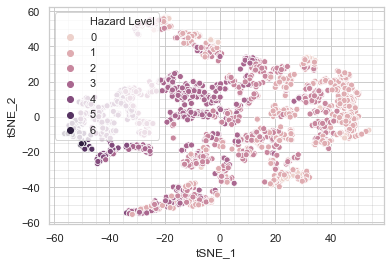

In [167]:
tsne = TSNE()
X_embedded = tsne.fit_transform(x)
plt.figure(figsize=(40,20))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel("tSNE_1")
plt.ylabel("tSNE_2")
sns.set(style='whitegrid',)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')
sns.set(style='whitegrid',)
plt.savefig('Fig57.pdf', dpi=300, bbox_inches='tight')

In [26]:
df.columns

Index(['Date Recorded', 'Month', 'Location', 'Temp', 'Wind Speed', 'PP',
       'Humidity', 'Barometer', 'Visibility',
       'Respirable Pariculate matter (PM10)',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)', 'Ozone (O3)',
       'Hazard Level', 'AQI'],
      dtype='object')

In [8]:
dataset = df[['Date Recorded', 'Month', 'Location',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)',
       ]]

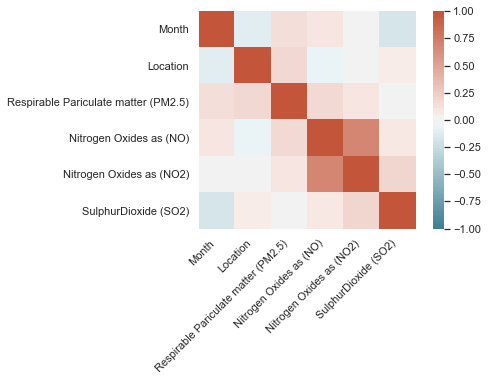

In [28]:
import seaborn as sns
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

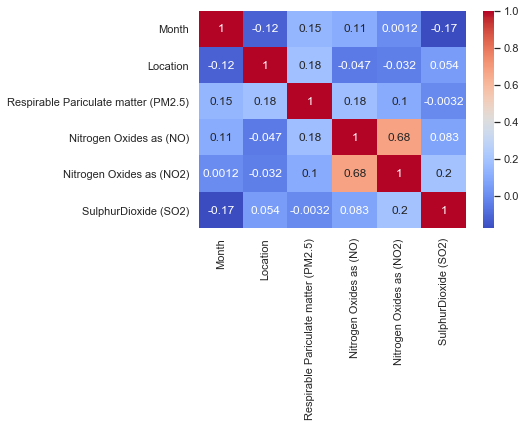

In [29]:
sns.heatmap(corr, annot=True, cmap = "coolwarm")

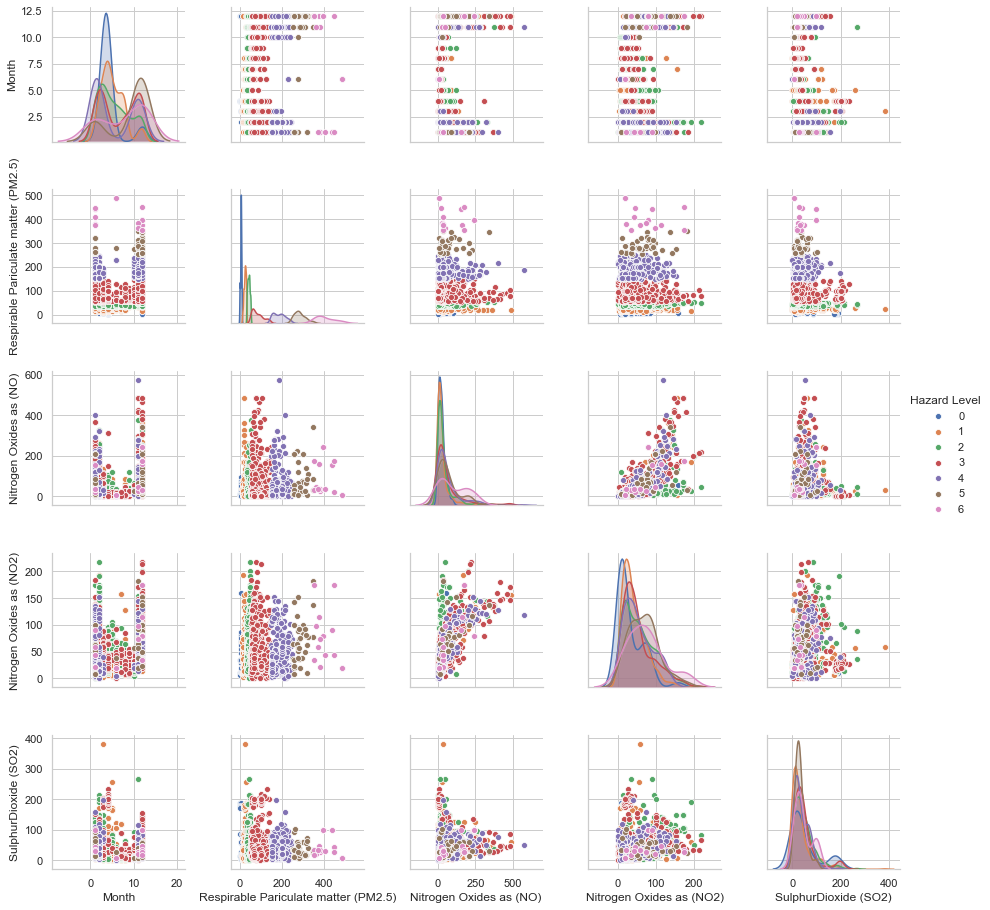

In [30]:
sns.pairplot(df[["Month", "Respirable Pariculate matter (PM2.5)", "Nitrogen Oxides as (NO)", "Nitrogen Oxides as (NO2)","SulphurDioxide (SO2)","Hazard Level"]], diag_kind="kde",hue='Hazard Level')

In [9]:
from collections import Counter
cut = int(dataset.shape[0]*0.8)
train = dataset.loc[:cut]
test = dataset.loc[cut:]

#train = train.drop(['Hazard Level'], axis=1)
#test = test.drop(['Hazard Level'], axis=1)
train = train.drop(['Date Recorded'], axis=1)
test = test.drop(['Date Recorded'], axis=1)

In [10]:
for s in range(1,25):
    train['shift_{}'.format(s)] = train['Respirable Pariculate matter (PM2.5)'].shift(s)
    test['shift_{}'.format(s)] = test['Respirable Pariculate matter (PM2.5)'].shift(s)

In [11]:
scaler = StandardScaler()
X_train = train.dropna().drop('Respirable Pariculate matter (PM2.5)', axis=1)
y_train = train.dropna()[['Respirable Pariculate matter (PM2.5)']]

X_test = test.dropna().drop('Respirable Pariculate matter (PM2.5)', axis=1)
y_test = test.dropna()[['Respirable Pariculate matter (PM2.5)']]

X_train_sc = StandardScaler().fit_transform(X_train)
scaler.fit(y_train)
y_train_sc = StandardScaler().fit_transform(y_train)

X_test_sc = StandardScaler().fit_transform(X_test)
scaler.fit(y_test)
y_test_sc = StandardScaler().fit_transform(y_test)

In [12]:
train.to_csv('train.csv')

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Adadelta
from keras.optimizers import SGD
from keras import regularizers
import keras.backend as K

Using TensorFlow backend.
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-pa

In [14]:
## Hyperparameter for Deep Learning
learning_rate = 0.0199939
training_epochs = 200
display_step = 200
factor = 0.10
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
dims = X_train_sc.shape[1]

In [11]:
model = Sequential()
model.add(Dense(128,
                input_shape=(dims,),
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
________________________________________________

In [12]:
model.compile(loss='mean_squared_error', optimizer=Adamax(lr=learning_rate))
history = model.fit(X_train_sc,y_train_sc,
                    batch_size=batch,
                    epochs=training_epochs,
                    validation_data=(X_test_sc, y_test_sc)) 

Instructions for updating:
Use tf.cast instead.
Train on 1476 samples, validate on 351 samples
Epoch 1/200
1476/1476 [==============================] - 1s 457us/step - loss: 1.1655 - val_loss: 0.8628
Epoch 2/200
1476/1476 [==============================] - 0s 21us/step - loss: 0.7803 - val_loss: 0.6360
Epoch 3/200
1476/1476 [==============================] - 0s 20us/step - loss: 0.5868 - val_loss: 0.5595
Epoch 4/200
1476/1476 [==============================] - 0s 20us/step - loss: 0.4913 - val_loss: 0.4222
Epoch 5/200
1476/1476 [==============================] - 0s 20us/step - loss: 0.4210 - val_loss: 0.3564
Epoch 6/200
1476/1476 [==============================] - 0s 20us/step - loss: 0.3404 - val_loss: 0.2900
Epoch 7/200
1476/1476 [==============================] - 0s 20us/step - loss: 0.3233 - val_loss: 0.3420
Epoch 8/200
1476/1476 [==============================] - 0s 21us/step - loss: 0.2958 - val_loss: 0.2861
Epoch 9/200
1476/1476 [==============================] - 0s 22us/step - 

1476/1476 [==============================] - 0s 19us/step - loss: 0.1012 - val_loss: 0.0777
Epoch 77/200
1476/1476 [==============================] - 0s 20us/step - loss: 0.0914 - val_loss: 0.0596
Epoch 78/200
1476/1476 [==============================] - 0s 19us/step - loss: 0.0953 - val_loss: 0.0677
Epoch 79/200
1476/1476 [==============================] - 0s 19us/step - loss: 0.0889 - val_loss: 0.0748
Epoch 80/200
1476/1476 [==============================] - 0s 19us/step - loss: 0.0847 - val_loss: 0.0760
Epoch 81/200
1476/1476 [==============================] - 0s 18us/step - loss: 0.0921 - val_loss: 0.0778
Epoch 82/200
1476/1476 [==============================] - 0s 18us/step - loss: 0.1011 - val_loss: 0.0584
Epoch 83/200
1476/1476 [==============================] - 0s 19us/step - loss: 0.0825 - val_loss: 0.0646
Epoch 84/200
1476/1476 [==============================] - 0s 19us/step - loss: 0.0945 - val_loss: 0.0419
Epoch 85/200
1476/1476 [==============================] - 0s 19us/st

<Figure size 720x432 with 0 Axes>

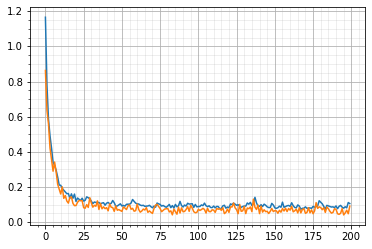

In [13]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

<Figure size 720x432 with 0 Axes>

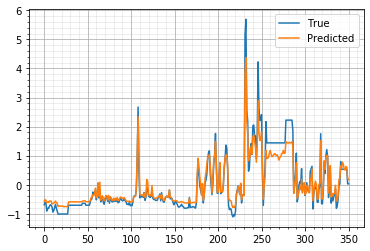

In [14]:
y_pred = model.predict(X_test_sc)
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(y_test_sc, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()

In [15]:
preds = model.predict(X_test_sc)
preds = scaler.inverse_transform(preds)

Ytest = scaler.inverse_transform(y_test_sc)
 

<Figure size 720x432 with 0 Axes>

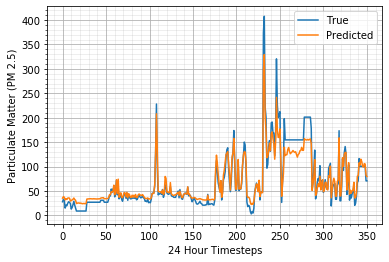

In [16]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(Ytest, label='True')
plt.plot(preds, label='Predicted')
plt.xlabel("24 Hour Timesteps")
plt.ylabel("Particulate Matter (PM 2.5)")
plt.legend()

## Time Series LSTM

In [113]:
X_tr_t = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])
X_tst_t = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

In [114]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(1, dims),
                    activation='relu',kernel_initializer='lecun_normal',
                    return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer=Nadam(lr=learning_rate), metrics=['mse', 'mae', 'mape', 'cosine'])
#model_lstm.compile(loss='mean_squared_error', optimizer=Nadam(lr=learning_rate))
history_model_lstm = model_lstm.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=False,
                                    validation_data=(X_tst_t, y_test_sc))

Train on 1476 samples, validate on 351 samples
Epoch 1/200
1476/1476 [==============================] - 0s 328us/step - loss: 3.4350 - mse: 1.0289 - mae: 0.6041 - mape: 298.7469 - cosine: 0.6477 - val_loss: 1.6628 - val_mse: 0.6574 - val_mae: 0.5561 - val_mape: 105.6529 - val_cosine: 0.6980
Epoch 2/200
1476/1476 [==============================] - 0s 41us/step - loss: 1.0012 - mse: 0.5093 - mae: 0.4155 - mape: 173.3576 - cosine: 0.7588 - val_loss: 0.7279 - val_mse: 0.6285 - val_mae: 0.5226 - val_mape: 103.8712 - val_cosine: 0.7265
Epoch 3/200
1476/1476 [==============================] - 0s 40us/step - loss: 0.5386 - mse: 0.4693 - mae: 0.4089 - mape: 177.8596 - cosine: 0.7873 - val_loss: 0.5119 - val_mse: 0.5701 - val_mae: 0.4365 - val_mape: 104.3521 - val_cosine: 0.7208
Epoch 4/200
1476/1476 [==============================] - 0s 39us/step - loss: 0.4368 - mse: 0.4294 - mae: 0.3766 - mape: 174.3755 - cosine: 0.7913 - val_loss: 0.4669 - val_mse: 0.4591 - val_mae: 0.4184 - val_mape: 173.87

1476/1476 [==============================] - 0s 39us/step - loss: 0.3228 - mse: 0.2740 - mae: 0.2934 - mape: 200.3412 - cosine: 0.8238 - val_loss: 0.4289 - val_mse: 0.4606 - val_mae: 0.3989 - val_mape: 107.8513 - val_cosine: 0.7493
Epoch 35/200
1476/1476 [==============================] - 0s 37us/step - loss: 0.3556 - mse: 0.3452 - mae: 0.3254 - mape: 144.1244 - cosine: 0.7940 - val_loss: 0.3942 - val_mse: 0.3806 - val_mae: 0.3554 - val_mape: 164.2863 - val_cosine: 0.7322
Epoch 36/200
1476/1476 [==============================] - 0s 38us/step - loss: 0.3420 - mse: 0.2846 - mae: 0.3076 - mape: 204.4022 - cosine: 0.8144 - val_loss: 0.5351 - val_mse: 0.6030 - val_mae: 0.5059 - val_mape: 173.5643 - val_cosine: 0.6524
Epoch 37/200
1476/1476 [==============================] - 0s 38us/step - loss: 0.4013 - mse: 0.3830 - mae: 0.3630 - mape: 234.1835 - cosine: 0.7967 - val_loss: 0.5529 - val_mse: 0.4707 - val_mae: 0.5069 - val_mape: 156.6297 - val_cosine: 0.6182
Epoch 38/200
1476/1476 [=========

1476/1476 [==============================] - 0s 38us/step - loss: 0.3497 - mse: 0.3508 - mae: 0.3224 - mape: 171.4691 - cosine: 0.8035 - val_loss: 0.3719 - val_mse: 0.3583 - val_mae: 0.3418 - val_mape: 143.5164 - val_cosine: 0.7436
Epoch 68/200
1476/1476 [==============================] - 0s 37us/step - loss: 0.3225 - mse: 0.2729 - mae: 0.2946 - mape: 220.7603 - cosine: 0.8130 - val_loss: 0.4117 - val_mse: 0.4249 - val_mae: 0.3850 - val_mape: 116.6419 - val_cosine: 0.7265
Epoch 69/200
1476/1476 [==============================] - 0s 38us/step - loss: 0.3297 - mse: 0.3111 - mae: 0.3033 - mape: 197.2296 - cosine: 0.8225 - val_loss: 0.4969 - val_mse: 0.4340 - val_mae: 0.4707 - val_mape: 138.5568 - val_cosine: 0.6980
Epoch 70/200
1476/1476 [==============================] - 0s 37us/step - loss: 0.3236 - mse: 0.2746 - mae: 0.2967 - mape: 174.2930 - cosine: 0.8144 - val_loss: 0.4093 - val_mse: 0.3788 - val_mae: 0.3829 - val_mape: 115.9339 - val_cosine: 0.7493
Epoch 71/200
1476/1476 [=========

1476/1476 [==============================] - 0s 39us/step - loss: 0.3328 - mse: 0.2953 - mae: 0.3076 - mape: 210.1526 - cosine: 0.8306 - val_loss: 0.3780 - val_mse: 0.3691 - val_mae: 0.3529 - val_mape: 110.6691 - val_cosine: 0.7379
Epoch 101/200
1476/1476 [==============================] - 0s 39us/step - loss: 0.3150 - mse: 0.2815 - mae: 0.2899 - mape: 182.4910 - cosine: 0.8225 - val_loss: 0.4006 - val_mse: 0.3955 - val_mae: 0.3755 - val_mape: 117.0214 - val_cosine: 0.7265
Epoch 102/200
1476/1476 [==============================] - 0s 40us/step - loss: 0.3136 - mse: 0.2920 - mae: 0.2877 - mape: 153.6214 - cosine: 0.8333 - val_loss: 0.3717 - val_mse: 0.3523 - val_mae: 0.3440 - val_mape: 124.6449 - val_cosine: 0.7379
Epoch 103/200
1476/1476 [==============================] - 0s 39us/step - loss: 0.3105 - mse: 0.2732 - mae: 0.2842 - mape: 187.6007 - cosine: 0.8360 - val_loss: 0.3896 - val_mse: 0.3993 - val_mae: 0.3651 - val_mape: 123.8180 - val_cosine: 0.7322
Epoch 104/200
1476/1476 [=====

1476/1476 [==============================] - 0s 39us/step - loss: 0.3107 - mse: 0.2748 - mae: 0.2882 - mape: 200.1303 - cosine: 0.8320 - val_loss: 0.3915 - val_mse: 0.3588 - val_mae: 0.3687 - val_mape: 112.4638 - val_cosine: 0.7493
Epoch 134/200
1476/1476 [==============================] - 0s 39us/step - loss: 0.3081 - mse: 0.2826 - mae: 0.2850 - mape: 163.0712 - cosine: 0.8279 - val_loss: 0.3832 - val_mse: 0.3651 - val_mae: 0.3594 - val_mape: 118.0226 - val_cosine: 0.7550
Epoch 135/200
1476/1476 [==============================] - 0s 39us/step - loss: 0.3211 - mse: 0.2900 - mae: 0.2980 - mape: 180.6687 - cosine: 0.8238 - val_loss: 0.4283 - val_mse: 0.4483 - val_mae: 0.4056 - val_mape: 134.8052 - val_cosine: 0.7265
Epoch 136/200
1476/1476 [==============================] - 0s 37us/step - loss: 0.3359 - mse: 0.3391 - mae: 0.3125 - mape: 150.8381 - cosine: 0.8130 - val_loss: 0.3458 - val_mse: 0.3451 - val_mae: 0.3208 - val_mape: 124.6017 - val_cosine: 0.7721
Epoch 137/200
1476/1476 [=====

1476/1476 [==============================] - 0s 41us/step - loss: 0.3094 - mse: 0.2857 - mae: 0.2890 - mape: 168.6067 - cosine: 0.8225 - val_loss: 0.3400 - val_mse: 0.3399 - val_mae: 0.3183 - val_mape: 114.1291 - val_cosine: 0.7436
Epoch 167/200
1476/1476 [==============================] - 0s 39us/step - loss: 0.3070 - mse: 0.2746 - mae: 0.2862 - mape: 242.4506 - cosine: 0.8347 - val_loss: 0.4093 - val_mse: 0.3956 - val_mae: 0.3897 - val_mape: 106.6307 - val_cosine: 0.7379
Epoch 168/200
1476/1476 [==============================] - 0s 38us/step - loss: 0.3372 - mse: 0.3209 - mae: 0.3168 - mape: 161.9115 - cosine: 0.8089 - val_loss: 0.3322 - val_mse: 0.3342 - val_mae: 0.3108 - val_mape: 117.6310 - val_cosine: 0.7664
Epoch 169/200
1476/1476 [==============================] - 0s 37us/step - loss: 0.2944 - mse: 0.2522 - mae: 0.2735 - mape: 214.1203 - cosine: 0.8225 - val_loss: 0.3964 - val_mse: 0.3717 - val_mae: 0.3768 - val_mape: 114.0072 - val_cosine: 0.7322
Epoch 170/200
1476/1476 [=====

1476/1476 [==============================] - 0s 40us/step - loss: 0.3115 - mse: 0.2741 - mae: 0.2910 - mape: 214.3306 - cosine: 0.7927 - val_loss: 0.3337 - val_mse: 0.3307 - val_mae: 0.3112 - val_mape: 118.4459 - val_cosine: 0.7379
Epoch 200/200
1476/1476 [==============================] - 0s 40us/step - loss: 0.3161 - mse: 0.2858 - mae: 0.2943 - mape: 253.4095 - cosine: 0.8266 - val_loss: 0.3967 - val_mse: 0.4019 - val_mae: 0.3756 - val_mape: 125.2420 - val_cosine: 0.7607


In [89]:
hist = pd.DataFrame(history_model_lstm.history)
hist['epoch'] = history_model_lstm.epoch
hist.tail()

,val_loss,val_mse,val_mae,val_mape,val_cosine,loss,mse,mae,mape,cosine,epoch
195,0.367342,0.377267,0.348099,135.589478,0.760684,0.293103,0.257534,0.274589,199.727829,0.821138,195
196,0.380717,0.365274,0.361812,126.557938,0.754986,0.316939,0.296751,0.298163,178.635315,0.821138,196
197,0.377740,0.367575,0.359377,127.066727,0.743590,0.300427,0.272255,0.281052,235.987762,0.831978,197
198,0.376689,0.389922,0.358452,135.188065,0.743590,0.294616,0.263329,0.276097,226.240112,0.822493,198
199,0.393577,0.379976,0.375979,122.628304,0.743590,0.306017,0.275939,0.287883,177.825775,0.817073,199


In [19]:
model_lstm.save("model_Panjab.h5")

In [20]:
from keras.models import load_model
model = load_model('model_UCIM.h5')

<Figure size 720x432 with 0 Axes>

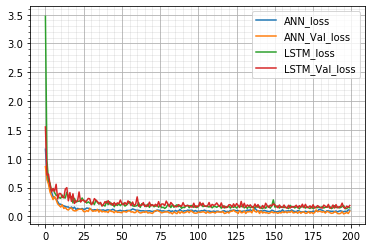

In [22]:

plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history.history['loss'], label='ANN_loss')
plt.plot(history.history['val_loss'], label='ANN_Val_loss')
plt.plot(history_model_lstm.history['loss'], label='LSTM_loss')
plt.plot(history_model_lstm.history['val_loss'], label='LSTM_Val_loss')
plt.legend()

<Figure size 720x432 with 0 Axes>

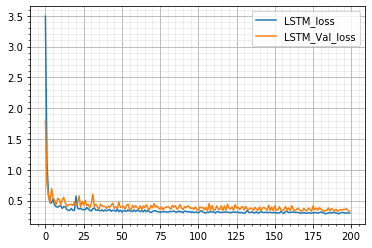

In [83]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history_model_lstm.history['loss'], label='LSTM_loss')
plt.plot(history_model_lstm.history['val_loss'], label='LSTM_Val_loss')
plt.legend()

<Figure size 720x432 with 0 Axes>

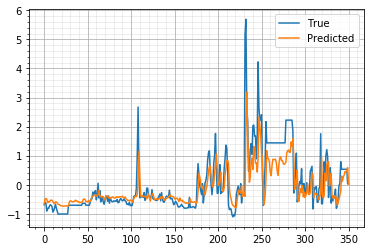

In [115]:
y_pred_lstm = model_lstm.predict(X_tst_t)
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(y_test_sc, label='True')
plt.plot(y_pred_lstm, label='Predicted')
plt.legend()

In [25]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test_sc, y_pred_lstm)
print('Test MSE: %.3f' % mse)
mae=mean_absolute_error(y_test_sc, y_pred_lstm)
print('Test MAE: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test_sc, y_pred_lstm))
print('Test RMSE: %.3f' % rmse)
print('Root Mean Squared Error: {:.4f}'.format(rmse))
from sklearn.metrics import r2_score
#Calculate R^2 (regression score function)
#print('Variance score: %.2f' % r2_score(y, data_pred))
print('Variance score: {:2f}'.format(r2_score(y_test_sc, y_pred_lstm)))

Test MSE: 0.048
Test MAE: 0.154
Test RMSE: 0.219
Root Mean Squared Error: 0.2192
Variance score: 0.951967


In [96]:
predsl = model_lstm.predict(X_tst_t)
predsl = scaler.inverse_transform(predsl)
Ytest = scaler.inverse_transform(y_test_sc)

<Figure size 2880x1440 with 0 Axes>

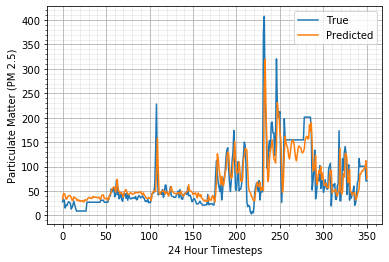

In [112]:
plt.figure(figsize=(40,20))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(Ytest, label='True')
plt.plot(predsl, label='Predicted')
plt.xlabel("24 Hour Timesteps")
plt.ylabel("Particulate Matter (PM 2.5)")
plt.legend()
plt.savefig('Fig25.pdf', dpi=300, bbox_inches='tight')

In [28]:
# calculate RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(Ytest, predsl)
print('Test MSE: %.3f' % mse)
mae=mean_absolute_error(Ytest, predsl)
print('Test MAE: %.3f' % mae)
rmse = sqrt(mean_squared_error(Ytest, predsl))
print('Test RMSE: %.3f' % rmse)

Test MSE: 169.930
Test MAE: 9.141
Test RMSE: 13.036


In [29]:
print('Root Mean Squared Error: {:.4f}'.format(rmse))
from sklearn.metrics import r2_score
#Calculate R^2 (regression score function)
#print('Variance score: %.2f' % r2_score(y, data_pred))
print('Variance score: {:2f}'.format(r2_score(Ytest, predsl)))

Root Mean Squared Error: 13.0357
Variance score: 0.951967


### Predicting Multiple Values

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
df =  pd.read_excel('PakEnvP.xlsx','Panjab')

In [30]:
dataset = df[['Date Recorded', 'Month', 'Location',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)']]
from collections import Counter
cut = int(dataset.shape[0]*0.8)
train = dataset.loc[:cut]
test = dataset.loc[cut:]

train = train.drop(['Date Recorded'], axis=1)
test = test.drop(['Date Recorded'], axis=1)
for s in range(1,25):
    train['shift_{}'.format(s)] = train['Respirable Pariculate matter (PM2.5)'].shift(s)
    test['shift_{}'.format(s)] = test['Respirable Pariculate matter (PM2.5)'].shift(s)

for i in range(-1,-25,-1):
    train['lag_{}'.format(i)] = train['Respirable Pariculate matter (PM2.5)'].shift(i)
    test['lag_{}'.format(i)] = test['Respirable Pariculate matter (PM2.5)'].shift(i)

train = train.drop('Respirable Pariculate matter (PM2.5)', axis=1)
test = test.drop('Respirable Pariculate matter (PM2.5)', axis=1)

In [31]:
target_vars = ['lag_-1','lag_-2','lag_-3','lag_-4',
               'lag_-5','lag_-6','lag_-7','lag_-8']
X_train = train.dropna().drop(target_vars, axis=1)
y_train = train.dropna()[target_vars]

X_test = test.dropna().drop(target_vars, axis=1)
y_test = test.dropna()[target_vars]
scaler = StandardScaler()
X_train_sc = StandardScaler().fit_transform(X_train)
scaler.fit(y_train)
y_train_sc = StandardScaler().fit_transform(y_train)

X_test_sc = StandardScaler().fit_transform(X_test)
scaler.fit(y_test)
y_test_sc = StandardScaler().fit_transform(y_test)

In [32]:
X_tr_t = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])

X_tst_t = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras import regularizers
import keras.backend as K

In [21]:
## Hyperparameter for Deep Learning
learning_rate = 0.01
training_epochs = 500
display_step = 200
factor = 0.10
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
dims = X_train_sc.shape[1]

In [22]:
K.clear_session()
model_lag = Sequential()
model_lag.add(LSTM(68, input_shape=(1, dims),
                    activation='relu',kernel_initializer='lecun_normal',
                    return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
model_lag.add(Dense(y_train_sc.shape[1]))
model_lag.compile(loss='mean_squared_error', optimizer=Adamax(lr=learning_rate))
history_model_lag = model_lag.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=False,
                                    validation_data=(X_tst_t, y_test_sc))

Train on 1476 samples, validate on 351 samples
Epoch 1/500
1476/1476 [==============================] - 1s 491us/step - loss: 2.5369 - val_loss: 2.0327
Epoch 2/500
1476/1476 [==============================] - 0s 37us/step - loss: 1.6014 - val_loss: 1.5434
Epoch 3/500
1476/1476 [==============================] - 0s 37us/step - loss: 1.3422 - val_loss: 1.2573
Epoch 4/500
1476/1476 [==============================] - 0s 37us/step - loss: 1.0929 - val_loss: 1.1309
Epoch 5/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.9692 - val_loss: 1.0537
Epoch 6/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.8576 - val_loss: 0.9718
Epoch 7/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.7983 - val_loss: 0.9178
Epoch 8/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.7475 - val_loss: 0.8709
Epoch 9/500
1476/1476 [==============================] - 0s 34us/step - loss: 0.7017 - val_loss: 0.8282
Epoch 10/500
147

1476/1476 [==============================] - 0s 34us/step - loss: 0.2257 - val_loss: 0.4042
Epoch 156/500
1476/1476 [==============================] - 0s 33us/step - loss: 0.2336 - val_loss: 0.3868
Epoch 157/500
1476/1476 [==============================] - 0s 33us/step - loss: 0.2335 - val_loss: 0.4096
Epoch 158/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.2490 - val_loss: 0.3904
Epoch 159/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.2334 - val_loss: 0.4144
Epoch 160/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.2401 - val_loss: 0.3884
Epoch 161/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.2330 - val_loss: 0.4069
Epoch 162/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.2386 - val_loss: 0.3904
Epoch 163/500
1476/1476 [==============================] - 0s 35us/step - loss: 0.2249 - val_loss: 0.4138
Epoch 164/500
1476/1476 [==============================] - 0

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history_model_lag.history['loss'])
plt.plot(history_model_lag.history['val_loss'])

In [ ]:
pred= model_lag.predict(X_tr_t)

In [ ]:
plt.figure(figsize=(20,7))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


plt.plot(y_train_sc, 'y')
plt.plot(pred, 'r--')
plt.show()

In [39]:
predsl = model_lag.predict(X_tr_t)
predsl = scaler.inverse_transform(predsl)
Ytest = scaler.inverse_transform(y_train_sc)

<Figure size 1440x504 with 0 Axes>

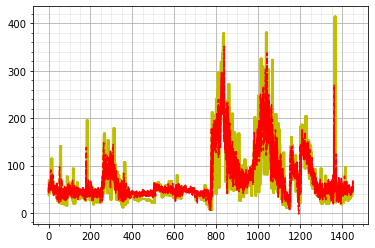

In [40]:
plt.figure(figsize=(20,7))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


plt.plot(Ytest, 'y')
plt.plot(predsl, 'r--')
plt.show()

In [41]:
predsl2 = model_lag.predict(X_tst_t)
predsl2 = scaler.inverse_transform(predsl2)
Ytest2 = scaler.inverse_transform(y_test_sc)

<Figure size 1440x504 with 0 Axes>

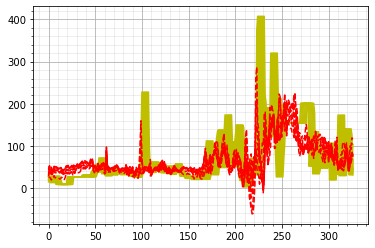

In [42]:
# Testing The model
plt.figure(figsize=(20,7))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


plt.plot(Ytest2, 'y')
plt.plot(predsl2, 'r--')
plt.show()

In [43]:
beg=0


selected_input = X_tst_t[beg:beg+1,:,:]
real_output = y_test_sc[beg:beg+1]
predicted_output = model_lag.predict(selected_input)



predicted_output=np.transpose(predicted_output)
real_output=np.transpose(real_output)


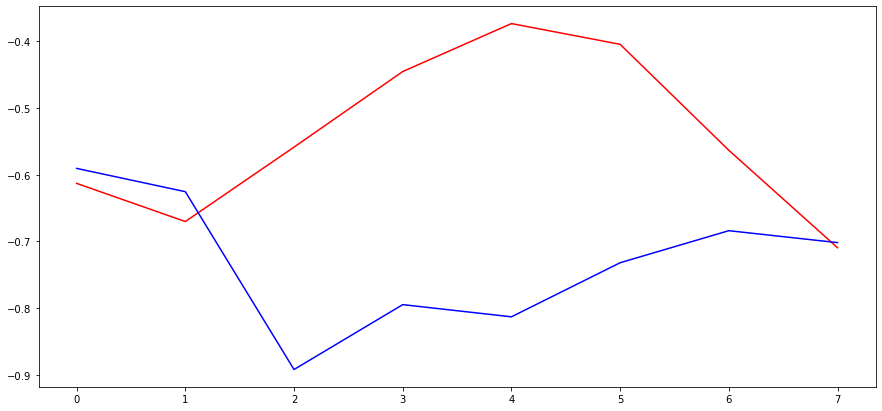

In [44]:
plt.figure(figsize=(15,7))
plt.plot(predicted_output,'r')
plt.plot(real_output, 'b')
plt.show()

# CNN-LSTM Model

In [45]:
# univariate multi-step encoder-decoder cnn-lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [46]:
X_tr_t.shape

(1452, 1, 45)

In [47]:
y_train_sc.shape

(1452, 8)

In [48]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1, dims),))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=False,
                                    validation_data=(X_tst_t, y_test_sc))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv1d_1/convolution/Conv2D' (op: 'Conv2D') with input shapes: [?,1,1,45], [1,3,45,64].